# Traditional methods of Graph Structure Learning

In this notebook, we will demonstrate the use of traditional (non deep learning) methods for Graph Structure Learning.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.cluster import KMeans

import networkx as nx
import contextily as cx
from matplotlib.pyplot import imshow

from whaletrips_dataset import collect_data, NAME2POS
from optimization_gsl import smoothness_function, fitness_function, diagonal_constraint, column_sum_constraint, positive_constraint

## Data Collection

In [2]:
whaletrips_data = collect_data()

# Fitness optimization

In [3]:
smoothness = smoothness_function(size=whaletrips_data.size, signal=whaletrips_data.df.values)
fitness = fitness_function(size=whaletrips_data.size, signal=whaletrips_data.df.values)

In [4]:
constraint_sums_one = column_sum_constraint(whaletrips_data.size)
constraint_positive = positive_constraint(whaletrips_data.size)
constraint_diagonal = diagonal_constraint(whaletrips_data.size)

In [5]:
optimization_result = minimize(fitness, np.identity(whaletrips_data.size).reshape(-1), constraints=(constraint_sums_one, constraint_positive, constraint_diagonal))

## Visualization

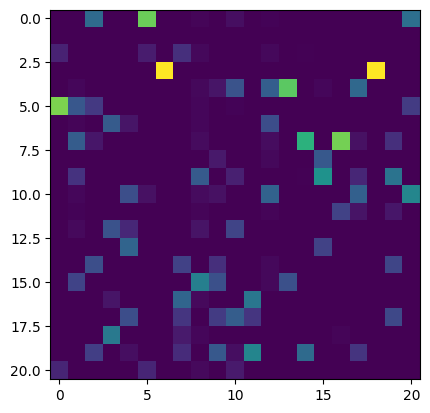

In [6]:
matrix = optimization_result.x.reshape(whaletrips_data.size, whaletrips_data.size)
imshow(matrix)

c:\Users\simon\Projets\CountryTrends\.conda\lib\site-packages\networkx\drawing\nx_pylab.py:304: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


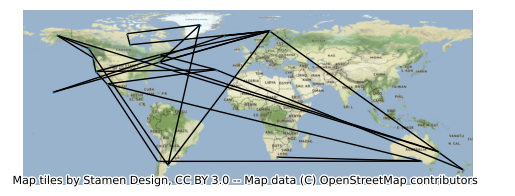

In [7]:
ax = plt.subplot()
g = nx.from_numpy_array(matrix > 2e-1, nx.DiGraph)
pos = [(NAME2POS[x][1], NAME2POS[x][0]) for x in whaletrips_data.df.index]
nx.set_node_attributes(g, pos, 'pos')
nx.draw(g, pos, ax=ax, node_size=0.3, connectionstyle="arc3,rad=0.1", arrowstyle="->")
cx.add_basemap(ax, crs='EPSG:4326')

# Clustering

In [8]:
labels = KMeans(n_clusters=5).fit_predict(whaletrips_data.df.values)
colors = ['blue', 'green', 'yellow', 'orange', 'red']

c:\Users\simon\Projets\CountryTrends\.conda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


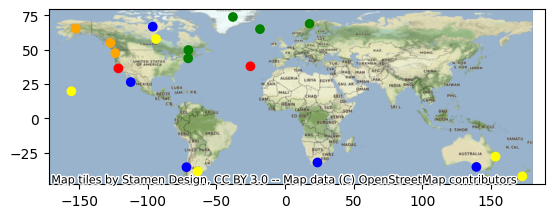

In [9]:
ax = plt.subplot()
pos = np.array([(NAME2POS[x][1], NAME2POS[x][0]) for x in whaletrips_data.df.index])
ax.scatter(pos[:,0], pos[:,1], c=[colors[i] for i in labels])
cx.add_basemap(ax, crs='EPSG:4326')